In [1]:
# Import Dependencies
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pprint

In [2]:
# Create two Dictionaries. One for all the data and one for 'Years' divisble by five.
compound_interest_dict = []
mod5_dict = []

# Create lists to append our values 
years_list = []
beginning_vals = []
compound_interest_list = []

mod_5_beginning_vals = []
mod5_periods_list = []
mod5_compound_interest_list = []

## User Input 
print("-- Time Value of Money --")

# Ask user for input 
payment = int(input("How much money (in EXACT U.S. dollars ($)) are you going to invest annually in the S&P 500? "))
beginning_vals.append(int(payment))

years = int(input("How many years ? "))

interest_rate = int(input("What percentage is your interest rate? "))

# Calculate Interest and End Value
simple_interest = round(interest_rate / 100 * payment, 2)
ioi = round(0, 2)
compound_interest = simple_interest + ioi
end_value = payment + compound_interest

# Loop through range of years that were inputted
for i in range(1, (int(years) + 1)):
    # Get info for base year
    if i == 1:
        first_year = {'Year' : i, 
                      'Beginning Value' : 0,
                      'Payment' : payment,
                      'Simple Interest' : simple_interest,
                      'Interest on Interest' : ioi,
                      'Total (Compound Interest)' : compound_interest,
                      'End Value' : end_value
                       }
        # Append first year to dictionary with all data
        compound_interest_dict.append(first_year)
        # Get year and append to appropriate list
        year = first_year.get('Year')
        years_list.append(int(year))
        # Get 'Total (Compound Interest)' and append to appropriate list
        compound_interest = first_year.get('Total (Compound Interest)')
        compound_interest_list.append(int(compound_interest))
        
    # Get information for every other year
    else:
        beginning_val = compound_interest_dict[i - 2].get('End Value')
        beginning_vals.append(beginning_val)
        
        pv = round(beginning_val + payment, 2)
        ioi = round(pv * (interest_rate/100) - simple_interest, 2)
        compound_interest = round(simple_interest + ioi, 2)
        end_value = round(beginning_val + payment + compound_interest, 2)
        
        years = {
            'Year' : i,
            'Beginning Value' : beginning_val,
            'Payment' : payment,
            'Present Value' : pv,
            'Simple Interest' : simple_interest,
            'Interest on Interest' : ioi,
            'Total (Compound Interest)' : compound_interest,
            'End Value' : end_value
        }
        
        compound_interest_dict.append(years)
        
        year = years.get('Year')
        years_list.append(int(year))
        
        compound_interest = years.get('Total (Compound Interest)')
        compound_interest_list.append(int(compound_interest))
        
        # Additionally, append specific data that is divisble by 5
        if i % 5 == 0:
            
            mod_5_beginning_val = compound_interest_dict[i - 2].get('End Value')
            mod_5_beginning_vals.append(int(mod_5_beginning_val))
            
            mod5_dict.append(years)
            
            mod5_period = years.get('Year')
            mod5_periods_list.append(int(mod5_period))
            
            mod5_compound_interest = years.get('Total (Compound Interest)')
            mod5_compound_interest_list.append(int(mod5_compound_interest))

# Print out the data in the main dictionary to view all the data
pprint.pprint(compound_interest_dict)

-- Time Value of Money --
How much money (in EXACT U.S. dollars ($)) are you going to invest annually in the S&P 500? 9894
How many years ? 30
What percentage is your interest rate? 7
[{'Beginning Value': 0,
  'End Value': 10586.58,
  'Interest on Interest': 0,
  'Payment': 9894,
  'Simple Interest': 692.58,
  'Total (Compound Interest)': 692.58,
  'Year': 1},
 {'Beginning Value': 10586.58,
  'End Value': 21914.22,
  'Interest on Interest': 741.06,
  'Payment': 9894,
  'Present Value': 20480.58,
  'Simple Interest': 692.58,
  'Total (Compound Interest)': 1433.64,
  'Year': 2},
 {'Beginning Value': 21914.22,
  'End Value': 34034.8,
  'Interest on Interest': 1534.0,
  'Payment': 9894,
  'Present Value': 31808.22,
  'Simple Interest': 692.58,
  'Total (Compound Interest)': 2226.58,
  'Year': 3},
 {'Beginning Value': 34034.8,
  'End Value': 47003.82,
  'Interest on Interest': 2382.44,
  'Payment': 9894,
  'Present Value': 43928.8,
  'Simple Interest': 692.58,
  'Total (Compound Interest)':

In [3]:
# Create a new DataFrame that displays the data from the main dictionary
compound_df = pd.DataFrame(compound_interest_dict, columns = ['Year', 
                                                              'Beginning Value', 
                                                              'Payment',
                                                              'Simple Interest', 
                                                              'Interest on Interest', 
                                                              'Total (Compound Interest)',
                                                              'End Value']).set_index("Year")
compound_df.head()

,Beginning Value,Payment,Simple Interest,Interest on Interest,Total (Compound Interest),End Value
Year,,,,,,
1,0.00,9894,692.58,0.00,692.58,10586.58
2,10586.58,9894,692.58,741.06,1433.64,21914.22
3,21914.22,9894,692.58,1534.00,2226.58,34034.80
4,34034.80,9894,692.58,2382.44,3075.02,47003.82
5,47003.82,9894,692.58,3290.27,3982.85,60880.67


In [4]:
# View the last five elements of DataFrame
compound_df.tail()

,Beginning Value,Payment,Simple Interest,Interest on Interest,Total (Compound Interest),End Value
Year,,,,,,
26,669591.08,9894,692.58,46871.38,47563.96,727049.04
27,727049.04,9894,692.58,50893.43,51586.01,788529.05
28,788529.05,9894,692.58,55197.03,55889.61,854312.66
29,854312.66,9894,692.58,59801.89,60494.47,924701.13
30,924701.13,9894,692.58,64729.08,65421.66,1000016.79


In [5]:
# Create a new DataFrame to view 'Payment', 'Total (Compound Interest)', and 'Beginning Value' data
new_compound_df = pd.DataFrame(compound_df, columns = ['Payment',
                                                       'Total (Compound Interest)',
                                                       'Beginning Value'])
new_compound_df.tail()

,Payment,Total (Compound Interest),Beginning Value
Year,,,
26,9894,47563.96,669591.08
27,9894,51586.01,727049.04
28,9894,55889.61,788529.05
29,9894,60494.47,854312.66
30,9894,65421.66,924701.13


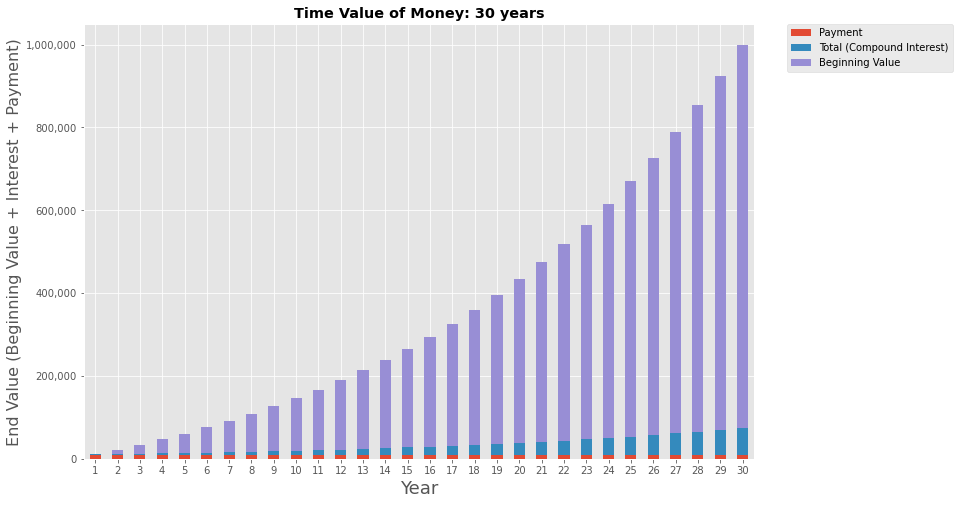

In [6]:
# Plot DataFrame as stacked bar chart using MatPlotlib
plt.style.use('ggplot')
ax = new_compound_df.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# Format y-axis tickers
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Plot legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x and y labels
ax.set_ylabel("End Value (Beginning Value + Interest + Payment)", fontsize=16)
ax.set_xlabel("Year", fontsize=18)
# Set Title
plt.title('Time Value of Money: ' + str(int(year)) + ' years', fontsize="x-large", fontweight = "bold")

# Save Image
# # plt.savefig('../Images/future_value_total_value.png')

# Plot graph
plt.show()

In [7]:
# Create new DataFrame using the dictionary that is divisble by five
mod5_df = pd.DataFrame(mod5_dict, columns = ['Year', 
                                             'Beginning Value', 
                                             'Simple Interest', 
                                             'Interest on Interest', 
                                             'Total (Compound Interest)',
                                             'End Value']).set_index("Year")
mod5_df

,Beginning Value,Simple Interest,Interest on Interest,Total (Compound Interest),End Value
Year,,,,,
5,47003.82,692.58,3290.27,3982.85,60880.67
10,126805.96,692.58,8876.42,9569.00,146268.96
15,238732.59,692.58,16711.28,17403.86,266030.45
20,395715.46,692.58,27700.08,28392.66,434002.12
25,615892.06,692.58,43112.44,43805.02,669591.08
30,924701.13,692.58,64729.08,65421.66,1000016.79


In [8]:
# Create a revised DataFrame to view 'Payment', 'Total (Compound Interest)', and 'Beginning Value' data divisble by five
revised_mod5_df = pd.DataFrame(mod5_dict, columns = ['Year', 
                                                 'Payment',
                                                 'Total (Compound Interest)',
                                                 'Beginning Value']).set_index("Year")
revised_mod5_df

,Payment,Total (Compound Interest),Beginning Value
Year,,,
5,9894,3982.85,47003.82
10,9894,9569.00,126805.96
15,9894,17403.86,238732.59
20,9894,28392.66,395715.46
25,9894,43805.02,615892.06
30,9894,65421.66,924701.13


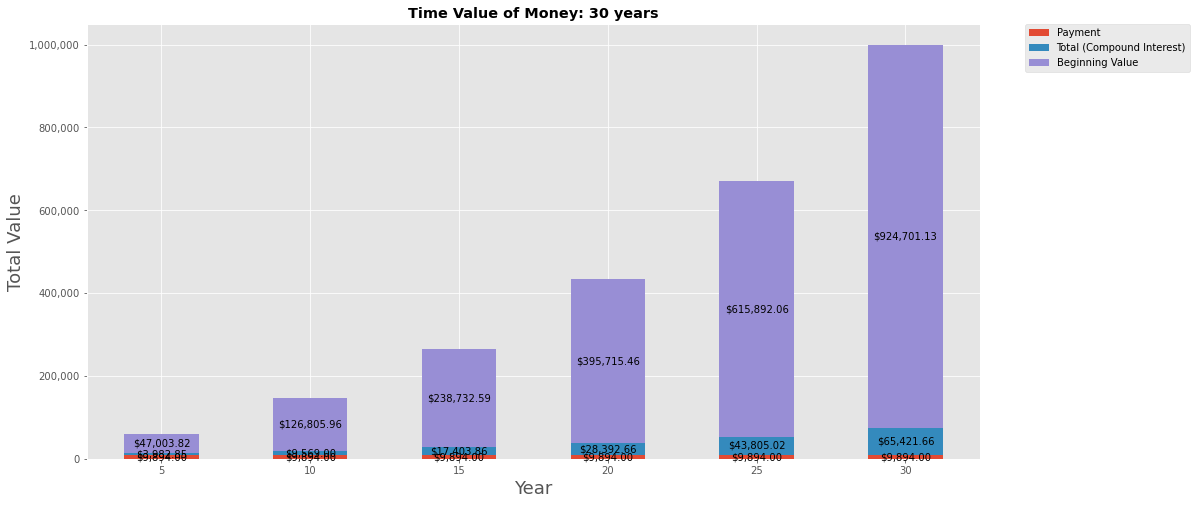

In [9]:
# Plot DataFrame as stacked bar chart using MatPlotlib
plt.style.use('ggplot')
ax = revised_mod5_df.plot(stacked=True, kind='bar', figsize=(16, 8), rot='horizontal')

# Format y-axis tickers 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'${height:,.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
# Plot legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
# Set x and y labels
ax.set_ylabel("Total Value", fontsize=18)
ax.set_xlabel("Year", fontsize=18)
# Set title
plt.title('Time Value of Money: ' + str(int(year)) + ' years', fontsize="x-large", fontweight = "bold")

# Save Image
# # plt.savefig('../Images/future_value_mod_five.png')

# Plot graph
plt.show()

## Calculate future value using numpy_financial to verify our code is correct 

In [10]:
# Make variables for interest rate, years, payment, present value
interest_rate = 0.07
years = 30
pmt = -9894
pv = 0

# Use Numpy Financial to calculate Future Value 
fv = npf.fv(interest_rate, years, pmt, pv, 1)
fv

1000016.6712792161